<a href="https://colab.research.google.com/github/liweitj47/ColabNotebooks/blob/main/contrastive_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

One of the the contrastive learning loss, triplet loss:

$L = max\{d(x, x^{+}) - d(x, x^{-}) + \alpha, 0\}$


In [ ]:
pos_dist = ((pos - x) ** 2).sum(dim=-1) ** 0.5
neg_dist = ((neg - x) ** 2).sum(dim=-1) ** 0.5
loss = (1 + pos_dist - neg_dist).clamp(min=0).mean()

clamp(min=0)就是截断到0

Another contrastive learning loss form, NCE loss:

$L = E_{x,x^+,x^k}[-log(\frac{e^{f(x)^{T}f(x^{+})}}{e^{f(x)^{T}f(x^{+})}+\sum^{K}_{k=1}e^{f(x)^{T}f(x^{k})}})]$

# simCSE
https://arxiv.org/pdf/2104.08821.pdf

本篇的这个工作则是采用了自监督来提升模型的句子表示能力，说到自监督最关键的问题应该就是如何构建正负例了。本文的正负例有两种构建方式，对于无监督来说，作者使用了Droupout来构建正例，将一个样本经过encoder两次，就得到了一个正例对，负例则是同一个batch里的其它句子。而对于有监督则采用了SNLI数据集天然的结构，对立类别的是负例，另外两个类别的就是正例。

#Difference-based Contrastive Learning (DiffCSE)
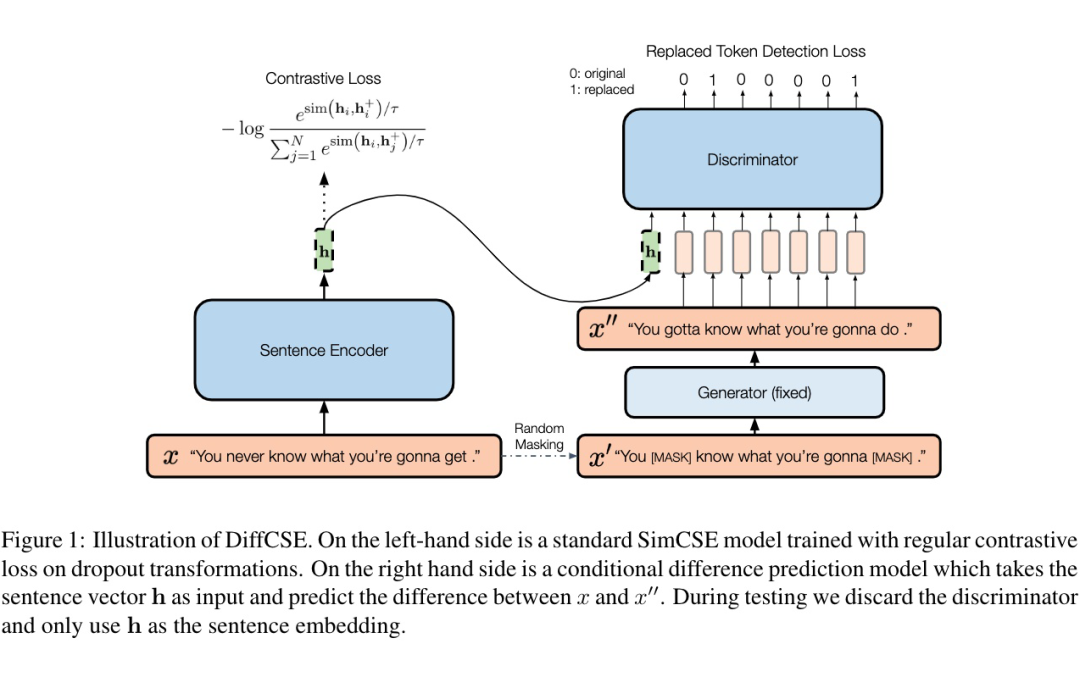
对于给定的长度为 T 的句子 x，在 x 上进行随机的 mask 以获得x' ，使用预训练好的 MLM 模型作为 generator 来恢复 mask tokens，得到x'' ，使用 discriminator 来进行替换的 token 检测的任务（RTD），对于句子中的每一个 token，模型需要预测该 token 是否被替换。

总的loss由两部分构成，一部分就是SIMCSE的对比学习loss，另一部分就是RTD的loss